## **06 규제 선형 모델 = 릿지, 라쏘, 엘라스틱넷**

## 1.규제 선형 모델의 개요

* 이전까지 선형 모델의 비용 함수는 **RSS를 최소화**하는 것만 고려함
 -> 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커짐
굵은 텍스트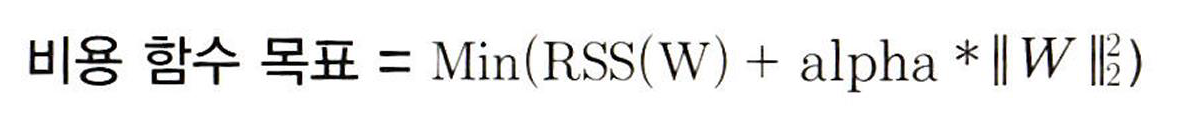


* `alpha` 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
  * alpha 값을 **크게** 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합 개선
  * alpha 값을 **작게** 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄 가능

1) 규제 : alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합 개선

(1) L2 규제 : **W의 제곱**에 대해 패널티를 부여하는 방식 -> `Ridge 회귀`

(2) L1 규제 : **W의 절댓값**에 대해 패널티를 부여하는 방식 -> `Lasso 회귀`

## 2.릿지 회귀

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
#boston 데이터 세트의 target 배열을 주택 가격이며 이를 Price 칼럼으로 추가
bostonDF["PRICE"] = boston.target
print('Boston 데이터 세트 크기 :',bostonDF.shape)
bostonDF.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)

Boston 데이터 세트 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

#alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data,y_target,scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [ ]:
#릿지의 alpha값을 변화시키면서 RMSE와 회귀 계수 값의 변화 살펴보기

alphas = [0,0.1,1,10,100]

for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring = 'neg_mean_squared_error',cv = 5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


<function matplotlib.pyplot.show>

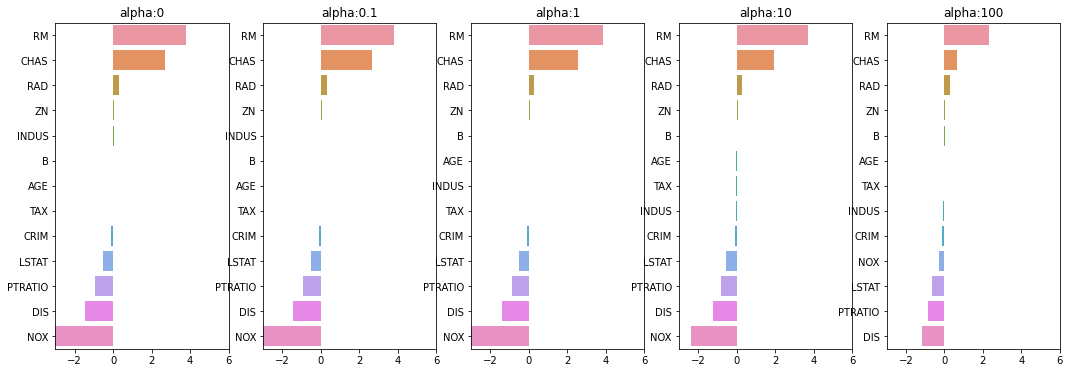

In [ ]:
#alpha값의 변화에 따른 피처의 회귀 계수 값 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(figsize = (18,6),nrows = 1, ncols = 5)
coeff_ridge_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data,y_target)
  #alpha 에 따른 피처별로 회귀 계수를 Seires로 변환하고, 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alpha:' + str(alpha)
  coeff_ridge_df[colname] = coeff

  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x = coeff.values,y = coeff.index,ax = axs[pos])

plt.show


In [ ]:
#alpha 값의 변화에 따른 릿지 회귀 계수 값 : 회귀 계수가 점점 작아지나 0으로 만들지는 않음
ridge_alpha = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alpha[0])
coeff_ridge_df.sort_values(by = sort_column,ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 3.라쏘 회귀
: L1규제를 선형 회귀에 적용한 것으로 L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 **0으로 만들고 제거**

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, X_data_n  = None, y_target_n = None, verbose = True) :
  coeff_df = pd.DataFrame()
  if verbose : print('#####', model_name, '#####')

  for param in params :
    if model_name == 'Ridge' : model = Ridge(alpha = param)
    elif model_name == 'Lasso' : model = Lasso(alpha = param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
    neg_mse_scores = cross_val_score(model,X_data_n,y_target_n, scoring= 'neg_mean_squared_error',cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때는 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))

    model.fit(X_data,y_target)
    coeff = pd.Series(data=model.coef_, index = X_data.columns)
    colname = 'alpha :' + str(param)
    coeff_df[colname] = coeff
  return coeff_df


In [ ]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

##### Lasso #####
alpha 0.07일 때는 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때는 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때는 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
sort_column = 'alpha :' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha :0.07,alpha :0.1,alpha :0.5,alpha :1,alpha :3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


##4.엘라스틱넷 회귀 
: **L2규제**와 **L1 규제**를 결합한 회귀

* 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 **중요 피처만을 셀렉션**하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향 강함 -> 이를 완화하기 위해 **L2 규제**를 라쏘 회귀에 추가
* L1과 L2규제가 결합된 규제로 인해 **수행시간**이 상대적으로 오래 걸림

1) `ElasticNet` 클래스

(1) 주요 생성 파라미터 `alpha` & `l1_ratio`
* alpha = a+b
* l1_ratio = a/(a+b)

(2) 규제 : a*L1 + b *L2

In [ ]:
#l1_ratio = 0.7로 고정

elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

##### ElasticNet #####
alpha 0.07일 때는 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때는 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때는 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
sort_column = 'alpha :' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column,ascending = False)

,alpha :0.07,alpha :0.1,alpha :0.5,alpha :1,alpha :3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 5.선형 회귀 모델을 위한 데이터 변환
: 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 변환 작업 수행

1) `StandardSclaer`클래스를 이용해 **평균이 0, 분산이 1**인 정규 분포를 가진 데이터 세트로 변환 / `MinMaxScaler`를 이용해 **최솟값이 0이고 최댓값이 1인** 값으로 정규화 수행

 -> 예측 성능 향상을 크게 기대하기 어려움

2) 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법. 1번을 통해 예측 성능에 향상이 없을 경우 적용

 -> 피처의 개수가 많은 우 과적합의 이슈 발생할 수 있음

3) 원래 값에 **log함수**를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 

In [ ]:
#p_degress는 다항식 특성을 추가할 때 적용.p_degree는 2이상 부여하지 않음
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None) :
  if method == 'Standard' :
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax' :
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log' :
    scaled_data = np.log1p(input_data)
  else :
    scaled_data = input_data

  if p_degree !=None :
    scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
  
  return scaled_data

In [ ]:
alphas = [0.1,1,10,100]

scale_methods = [(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods :
  X_data_scaled = get_scaled_data(method = scale_method[0],p_degree = scale_method[1],input_data = X_data)
  print('\n##변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge',params = alphas, X_data_n = X_data_scaled, y_target_n = y_target,verbose = False)


##변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 5.330

##변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 5.421

##변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 4.634

##변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 7.635

##변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때는 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때는 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때는 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때는 5 폴드 세트의 평균 RMSE: 6.538

##변환 유형 : Log, Polynomial Degree : Non


##**07 로지스틱 회귀**

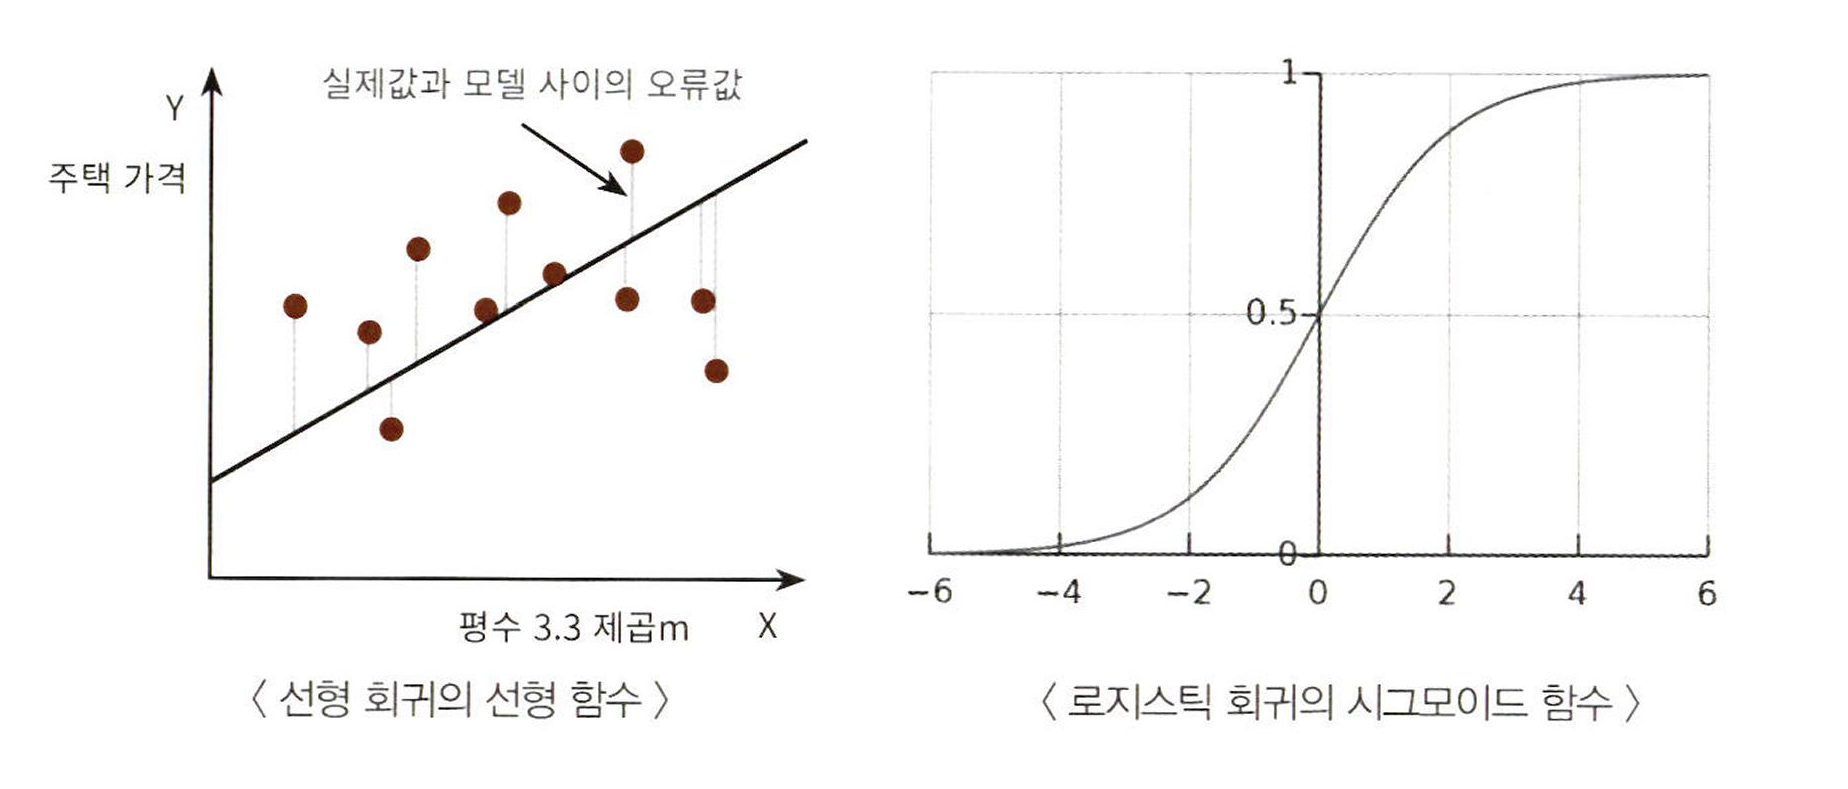


* 로지스틱 회귀 : 선형 회귀 방식을 **분류**에 적용한 알고리즘 -> 선형 회귀
* 선형회귀와 다른 점 : 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류 결정

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled,cancer.target,test_size = 0.3, random_state = 0)

In [ ]:
#학습 및 예측 수행, 정확도와 ROC-AUC

from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc : {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy : 0.977
roc_auc : 0.972


1) `Logisticregression` 클래스의 주요 하이퍼 파라미터

* `penalty` : 규제의 유형 설정, 기본은 'l2'
* `C` : 규제 강도를 조절하는 alpha값의 역수 , C값이 작을 수록 **규제 강도가 큼**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1'],
          'C' : [0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf,param_grid = params, scoring = 'accuracy',cv = 3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                     grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

---
## **08 회귀 트리**

: 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 **리프 노드에 속한 데이터 값의 평균값**을 구해 회귀 예측값 계산

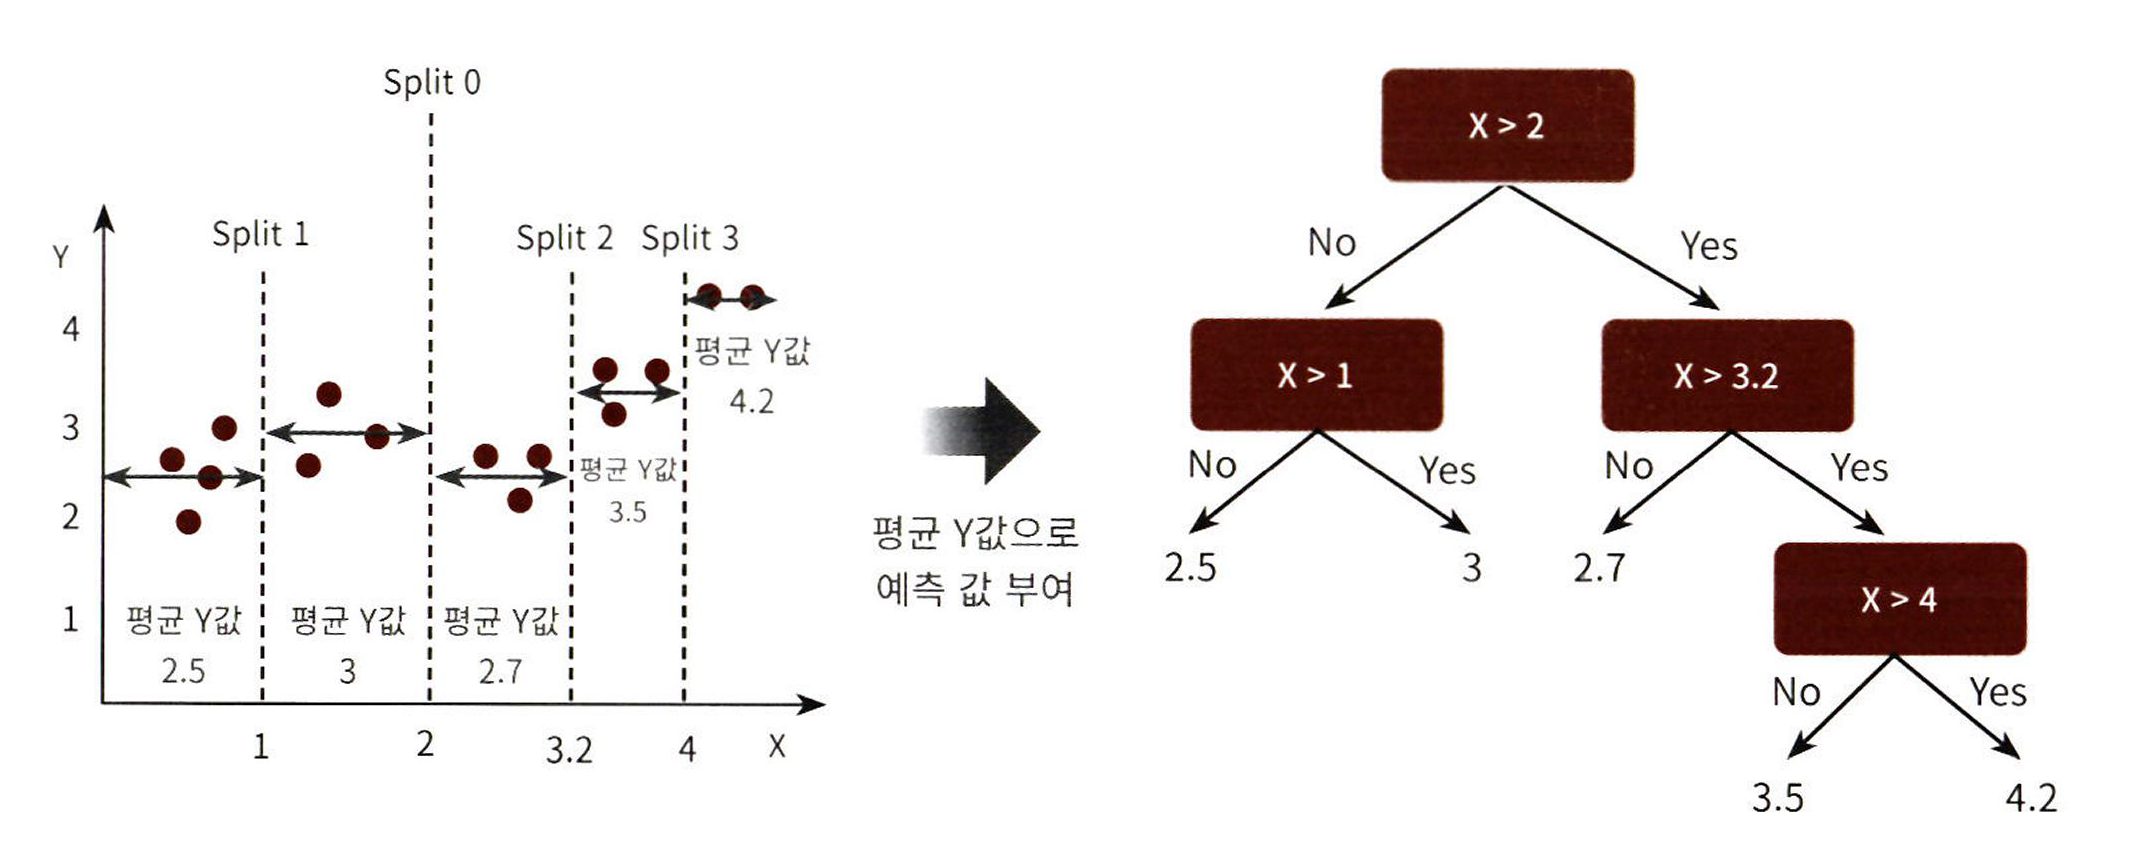

* 사이킷런의 트리 기반 회귀와 분류의 Estimator 클래스를 표로 나타낸 것

|알고리즘|회귀 Estimator 클래스|분류 Estimator 클래스|
|---|---|---|
|Decision Tree|DecisionTreeRegressor|DecisionTreeClassifier|
|Gradient Boosting|GradientBoostingRegressor|GradientBoostingClassifier|
|XGBoost|XGBRegressor|XGBClassifier|
|LightGBM|LGBMRegressor|LGBMClassifier|

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [ ]:
def get_model_cv_prediction(model,X_data,y_target) :
  neg_mse_scores = cross_val_score(model,X_data,y_target, scoring = 'neg_mean_squared_error',cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####',model.__class__.__name__,'#####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

models = [dt_reg,rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
  get_model_cv_prediction(model, X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
[05:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.089
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


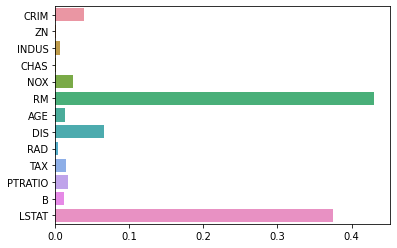

In [ ]:
#피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_,index = X_data.columns)
featues_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

(100, 2)


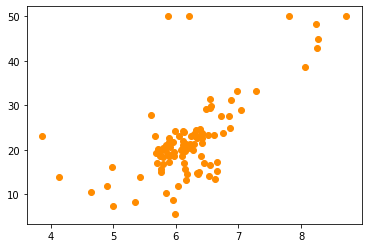

In [ ]:
#결정 트리의 하이퍼 파라미터인 max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 살펴보기
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')

In [ ]:
#max_depth를 2,7로 해서 학습

import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


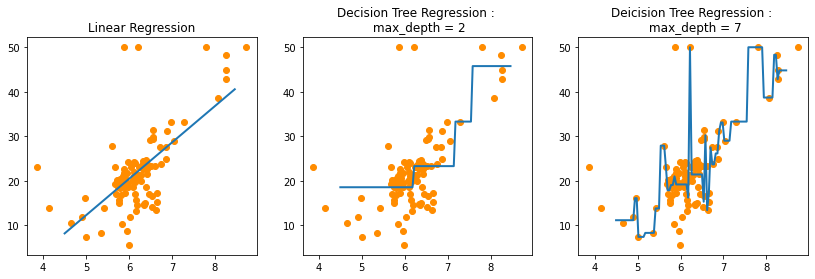

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize = (14,4),ncols = 3)

#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c = 'darkorange')
ax1.plot(X_test,pred_lr, label = 'linear',linewidth = 2)

ax2.set_title('Decision Tree Regression : \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c = 'darkorange')
ax2.plot(X_test,pred_rf2,label = 'max_depth :3', linewidth = 2)

ax3.set_title('Deicision Tree Regression : \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax3.plot(X_test,pred_rf7, label = 'max_depth : 7', linewidth = 2)

* 선형 회귀 : 직선으로 예측 회귀선을 표현
* 회귀트리 : 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선